In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DRIVE_PATH = '/content/drive/MyDrive/DataScience[Практика]/Дататон[хакатон]/Task2/unzipped_data/'

In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

###EVAL

In [7]:
import cv2
import random
import numpy as np

size = (100, 100)

#no_drive_circle = [(21, 21), 18]
#no_entry_circle = [(20, 20), 20]

a_unevenness_points = np.array([[19, 1], [36, 34], [1, 34]], dtype=np.int32)
no_drive_points = np.array([[21, 2], [34, 10],
                   [39, 20], [35, 32],
                   [20, 39], [9, 34],
                   [3, 21], [9, 8]], dtype=np.int32)
no_entry_points = np.array([[20, 0], [34, 5],
                   [39, 20], [35, 33],
                   [20, 39], [5, 34],
                   [0, 20], [5, 5]], dtype=np.int32)
parking_points = np.array([[0, 0], [0, 39],
                  [39, 39], [39, 0]], dtype=np.int32)
pedestrian_points = np.array([[19, 2], [37, 31], [3, 32]], dtype=np.int32)
road_works_points = np.array([[22, 5], [35, 35], [5, 34]], dtype=np.int32)
stop_points = np.array([[11, 1], [29, 1],
               [39, 10], [29, 28],
               [27, 39], [11, 39],
               [1, 29], [0, 13]], dtype=np.int32)
way_out_points = np.array([[4, 3], [36, 4], [22, 34]], dtype=np.int32)



def cut_background_black(image, image_mask_points):
    
  mask = np.zeros(image.shape, dtype=np.uint8)
  roi_corners = np.array(image_mask_points)

  ignore_mask_color = (255, 255, 255)

  cv2.fillConvexPoly(mask, roi_corners, ignore_mask_color)

  image = cv2.bitwise_and(image, mask)

  cv2_imshow(image)

  return image

In [10]:
import cv2
import random
import numpy as np

size = (100, 100)

def get_overlap(im10, im20, size):
  im1 = im10.copy()
  im2 = im20.copy()

  im1 = cv2.resize(im1, size)
  im2 = cv2.resize(im2, size)

  im1 = im1.flatten() // 255
  im2 = im2.flatten() // 255

  delta = im1 ^ im2
  error_pixels = sum(delta)

  return 1 - error_pixels / (size[0] * size[1])

def color_up(img, color_max=255):
  image = img.copy()
  for i in range(size[0]):
    for j in range(size[1]):
      delta = color_max - max(image[i][j])
      if delta > 0:
        image[i][j] = image[i][j] + delta // 2
  return image

def get_standatr_signs():
    """Функция, позволяющая получить стандартные изображения знаков для сравнения
    с оригинальными изображениями. Стандартные изображения знаков хранятся во внутреннем каталоге."""
    # стандартные изображения дорожных знаков

    a_unevenness = cv2.imread(DRIVE_PATH + "data/standards/a_unevenness.jpg")
    a_unevenness = cut_background_black(a_unevenness, a_unevenness_points)
    a_unevenness = cv2.inRange(a_unevenness, (70, 70, 70), (255, 255, 255))
    a_unevenness = cv2.resize(a_unevenness, size)

    no_drive = cv2.imread(DRIVE_PATH + "data/standards/no_drive.png")
    no_drive = cut_background_black(no_drive, no_drive_points)
    no_drive = cv2.inRange(no_drive, (89, 91, 149), (255, 255, 255))
    no_drive = cv2.resize(no_drive, size)

    no_entry = cv2.imread(DRIVE_PATH + "data/standards/no_entry.jpg")
    no_entry = cut_background_black(no_entry, no_entry_points)
    no_entry = cv2.inRange(no_entry, (89, 91, 149), (255, 255, 255))
    no_entry = cv2.resize(no_entry, size)

    parking = cv2.imread(DRIVE_PATH + "data/standards/parking.jpg")
    parking = cut_background_black(parking, parking_points)
    parking = cv2.inRange(parking, (89, 91, 149), (255, 255, 255))
    parking = cv2.resize(parking, size)

    pedistrain = cv2.imread(DRIVE_PATH + "data/standards/pedistrain.jpg")
    pedistrain = cut_background_black(pedistrain, pedestrian_points)
    pedistrain = cv2.inRange(pedistrain, (89, 91, 149), (255, 255, 255))
    pedistrain = cv2.resize(pedistrain, size)

    road_works = cv2.imread(DRIVE_PATH + "data/standards/road_works.jpg")
    road_works = cut_background_black(road_works, road_works_points)
    road_works = cv2.inRange(road_works, (110, 110, 185), (255, 255, 255))
    road_works = cv2.resize(road_works, size)

    stop = cv2.imread(DRIVE_PATH + "data/standards/stop.jpg")
    stop = cut_background_black(stop, stop_points)
    stop = cv2.inRange(stop, (89, 91, 149), (255, 255, 255))
    stop = cv2.resize(stop, size)

    way_out = cv2.imread(DRIVE_PATH + "data/standards/way_out.jpg")
    way_out = cut_background_black(way_out, way_out_points)
    way_out = cv2.inRange(way_out, (89, 91, 149), (255, 255, 255))
    way_out = cv2.resize(way_out, size)

    standart_signs = {
        "a_unevenness": a_unevenness,
        "no_drive": no_drive,
        "no_entry": no_entry,
        "parking": parking,
        "pedistrain": pedistrain,
        "road_works": road_works,
        "stop": stop,
        "way_out": way_out
    }

    # kernel = np.ones((5, 5), np.uint8)
    # for sign in standart_signs.keys():
    #   standart_signs[sign] = cv2.erode(standart_signs[sign], kernel) 
    #   standart_signs[sign] = cv2.dilate(standart_signs[sign], kernel, iterations = 1)

    return standart_signs

def one_hot_encode(label):

    one_hot_encoded = []
    if label == "none":
        one_hot_encoded = [0, 0, 0, 0, 0, 0, 0, 0]
    elif label == "pedistrain":
        one_hot_encoded = [1, 0, 0, 0, 0, 0, 0, 0]
    elif label == "no_drive":
        one_hot_encoded = [0, 1, 0, 0, 0, 0, 0, 0]
    elif label == "stop":
        one_hot_encoded = [0, 0, 1, 0, 0, 0, 0, 0]
    elif label == "way_out":
        one_hot_encoded = [0, 0, 0, 1, 0, 0, 0, 0]
    elif label == "no_entry":
        one_hot_encoded = [0, 0, 0, 0, 1, 0, 0, 0]
    elif label == "road_works":
        one_hot_encoded = [0, 0, 0, 0, 0, 1, 0, 0]
    elif label == "parking":
        one_hot_encoded = [0, 0, 0, 0, 0, 0, 1, 0]
    elif label == "a_unevenness":
        one_hot_encoded = [0, 0, 0, 0, 0, 0, 0, 1]

    return label, one_hot_encoded

def predict_label(image):

    #------------STANDART SIGNS-------------#
    standart_signs = get_standatr_signs()
    a_unevenness = standart_signs["a_unevenness"]
    no_drive = standart_signs["no_drive"]
    no_entry = standart_signs["no_entry"]
    parking = standart_signs["parking"]
    pedistrain = standart_signs["pedistrain"]
    road_works = standart_signs["road_works"]
    stop = standart_signs["stop"]
    way_out = standart_signs["way_out"]

    #--------------WORKING WITH IMAGE--------------#
    print('-' * 100)

    image = cv2.resize(image, size)
    image1 = image.copy()
    image2 = image.copy()
    image3 = image.copy()

    kernel1 = np.array([[-0.1, 0.2, -0.1], [0.2, 3, 0.2], [-0.1, 0.2, -0.1]])
    image1 = cv2.filter2D(image1, -1, kernel1)
    kernel3 = np.array([[-0.1, 0.1, -0.1], [0.1, 0.5, 0.1], [-0.1, 0.1, -0.1]])
    image3 = cv2.filter2D(image3, -1, kernel3)

    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

    _, image1 = cv2.threshold(image1, 135, 255, cv2.THRESH_BINARY)
    cv2_imshow(image1)
    _, image2 = cv2.threshold(image2, 120, 255, cv2.THRESH_BINARY)
    cv2_imshow(image2)
    _, image3 = cv2.threshold(image3, 105, 255, cv2.THRESH_BINARY)
    cv2_imshow(image3)

    print(image3.shape)


    #----------------FINDING MAX ACCURACY---------------#
    main_percent = 0.55

    def get_arg_max(image):
        a_unevenness_val = get_overlap(a_unevenness, image, size)
        no_drive_val = get_overlap(no_drive, image, size)
        no_entry_val = get_overlap(no_entry, image, size)
        parking_val = get_overlap(parking, image, size)
        pedistrain_val = get_overlap(pedistrain, image, size)
        road_works_val = get_overlap(road_works, image, size)
        stop_val = get_overlap(stop, image, size)
        way_out_val = get_overlap(way_out, image, size)

        signs = {
            "a_unevenness": a_unevenness_val,
            "no_drive": no_drive_val,
            "no_entry": no_entry_val,
            "parking": parking_val,
            "pedistrain": pedistrain_val,
            "road_works": road_works_val,
            "stop": stop_val,
            "way_out": way_out_val,
        }

        names = list(signs.keys())

        full_picture = size[0] * size[1]

        white_pixels_percents = sum(image.flatten() // 255) / len(image.flatten())
        if white_pixels_percents < 0.15 or white_pixels_percents > 0.85:
          for key in signs.keys():
            signs[key] = 0
        
        max_ind = np.argmax(list(signs.values()))

        return signs, max_ind


    results = [get_arg_max(image1), get_arg_max(image2), get_arg_max(image3)]

    all_signs = np.array(list(map(lambda x:x[0], results)))
    all_inds = np.array(list(map(lambda x:x[1], results)))

    max_ind_of_result = np.argmax([all_signs[ind][list(all_signs[ind].keys())[all_inds[ind]]] for ind in range(3)])
    max_ind = all_inds[max_ind_of_result]
    signs = all_signs[max_ind_of_result]
    names = list(all_signs[max_ind_of_result].keys())
    

    if signs[names[max_ind]] > main_percent:
        predicted_label = one_hot_encode(list(signs.keys())[max_ind])
    else:
        predicted_label = one_hot_encode("none")

    print()
    for name in signs:
      print(name.ljust(12, ' '), '{:.1f}'.format(all_signs[0][name] * 100) + '%', end=' - ')
      print('{:.1f}'.format(all_signs[1][name] * 100) + '%', end=' - ')
      print('{:.1f}'.format(all_signs[2][name] * 100) + '%')
    print('_______________')
    print('RESULT:', predicted_label[0].ljust(10, ' '))
    if predicted_label[0] != 'none':
      cv2_imshow(standart_signs[predicted_label[0]])
    print('_______________')

    return predicted_label[1]


number_of_pictures = 1

### HELPERS

In [2]:
# Helper functions
import cv2
import os
import glob  # library for loading images from a directory


# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    # Populate this empty image list
    im_list = []
    image_types = ["none", "pedistrain", "no_drive","stop","way_out","no_entry","road_works","parking","a_unevenness"]

    # Iterate through each color folder
    for im_type in image_types:

        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in os.listdir(os.path.join(image_dir, im_type))[:number_of_pictures]:
            # Read in the image
            # im = mpimg.imread(file)
            im = cv2.imread(os.path.join(image_dir, im_type, file))
            if im is None:
              print('im not found')
              continue

            im = im[:, :, ::-1]

            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type ("none", "pedistrain", "no_drive","stop","way-out","no_entry","road_works","parking","a_unevenness") to the image list
                im_list.append((im, im_type))
    return im_list



###MAIN

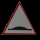

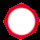

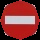

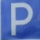

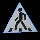

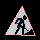

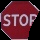

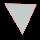

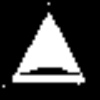

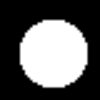

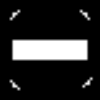

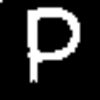

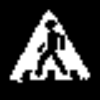

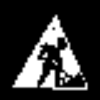

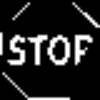

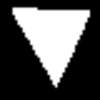

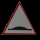

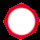

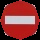

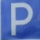

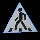

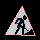

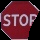

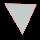

----------------------------------------------------------------------------------------------------


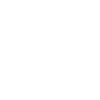

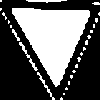

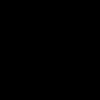

(100, 100)

a_unevenness 0.0% - 69.5% - 0.0%
no_drive     0.0% - 73.4% - 0.0%
no_entry     0.0% - 65.5% - 0.0%
parking      0.0% - 69.5% - 0.0%
pedistrain   0.0% - 63.3% - 0.0%
road_works   0.0% - 61.4% - 0.0%
stop         0.0% - 62.1% - 0.0%
way_out      0.0% - 91.3% - 0.0%
_______________
RESULT: way_out   


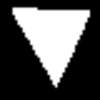

_______________


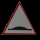

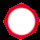

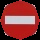

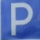

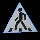

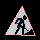

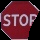

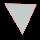

----------------------------------------------------------------------------------------------------


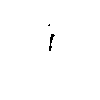

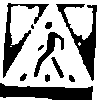

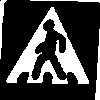

(100, 100)

a_unevenness 0.0% - 43.1% - 74.4%
no_drive     0.0% - 51.1% - 71.8%
no_entry     0.0% - 38.2% - 72.0%
parking      0.0% - 40.1% - 71.6%
pedistrain   0.0% - 46.0% - 84.5%
road_works   0.0% - 40.1% - 75.0%
stop         0.0% - 35.4% - 73.8%
way_out      0.0% - 50.6% - 63.5%
_______________
RESULT: pedistrain


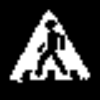

_______________


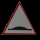

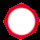

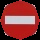

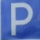

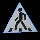

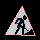

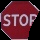

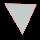

----------------------------------------------------------------------------------------------------


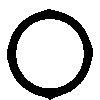

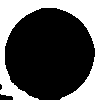

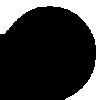

(100, 100)

a_unevenness 37.5% - 46.2% - 57.3%
no_drive     52.0% - 31.4% - 42.5%
no_entry     31.8% - 52.2% - 63.3%
parking      24.6% - 54.8% - 65.7%
pedistrain   30.5% - 52.3% - 63.3%
road_works   29.5% - 54.3% - 65.3%
stop         24.2% - 60.7% - 71.1%
way_out      38.6% - 42.0% - 51.1%
_______________
RESULT: stop      


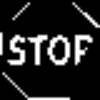

_______________


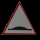

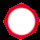

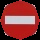

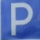

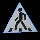

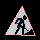

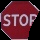

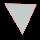

----------------------------------------------------------------------------------------------------


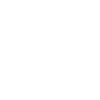

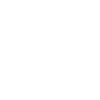

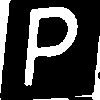

(100, 100)

a_unevenness 0.0% - 0.0% - 67.9%
no_drive     0.0% - 0.0% - 60.0%
no_entry     0.0% - 0.0% - 73.1%
parking      0.0% - 0.0% - 81.5%
pedistrain   0.0% - 0.0% - 70.2%
road_works   0.0% - 0.0% - 70.2%
stop         0.0% - 0.0% - 73.6%
way_out      0.0% - 0.0% - 69.3%
_______________
RESULT: parking   


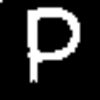

_______________


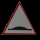

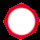

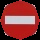

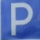

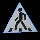

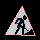

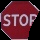

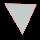

----------------------------------------------------------------------------------------------------


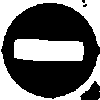

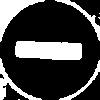

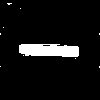

(100, 100)

a_unevenness 56.1% - 68.7% - 0.0%
no_drive     50.7% - 61.3% - 0.0%
no_entry     71.2% - 83.5% - 0.0%
parking      56.4% - 70.4% - 0.0%
pedistrain   55.6% - 69.0% - 0.0%
road_works   52.5% - 66.7% - 0.0%
stop         60.7% - 73.9% - 0.0%
way_out      47.3% - 59.2% - 0.0%
_______________
RESULT: no_entry  


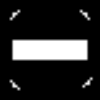

_______________


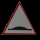

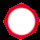

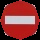

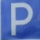

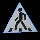

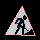

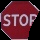

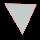

----------------------------------------------------------------------------------------------------


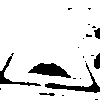

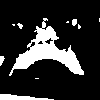

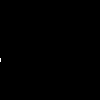

(100, 100)

a_unevenness 0.0% - 84.9% - 0.0%
no_drive     0.0% - 74.6% - 0.0%
no_entry     0.0% - 83.6% - 0.0%
parking      0.0% - 79.2% - 0.0%
pedistrain   0.0% - 84.9% - 0.0%
road_works   0.0% - 80.9% - 0.0%
stop         0.0% - 82.1% - 0.0%
way_out      0.0% - 71.1% - 0.0%
_______________
RESULT: a_unevenness


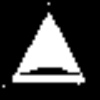

_______________


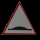

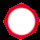

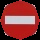

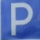

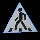

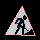

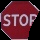

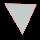

----------------------------------------------------------------------------------------------------


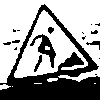

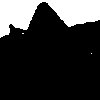

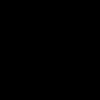

(100, 100)

a_unevenness 43.5% - 60.0% - 0.0%
no_drive     44.7% - 45.4% - 0.0%
no_entry     41.9% - 66.0% - 0.0%
parking      43.4% - 72.2% - 0.0%
pedistrain   43.4% - 66.0% - 0.0%
road_works   38.8% - 68.1% - 0.0%
stop         39.4% - 73.8% - 0.0%
way_out      52.5% - 62.9% - 0.0%
_______________
RESULT: stop      


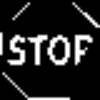

_______________


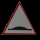

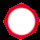

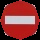

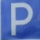

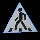

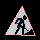

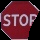

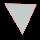

----------------------------------------------------------------------------------------------------


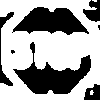

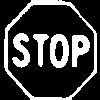

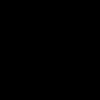

(100, 100)

a_unevenness 43.7% - 70.2% - 0.0%
no_drive     44.9% - 63.7% - 0.0%
no_entry     48.1% - 76.0% - 0.0%
parking      35.1% - 69.1% - 0.0%
pedistrain   40.3% - 71.2% - 0.0%
road_works   36.7% - 70.2% - 0.0%
stop         41.1% - 78.1% - 0.0%
way_out      38.8% - 61.9% - 0.0%
_______________
RESULT: stop      


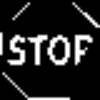

_______________


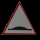

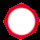

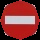

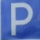

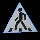

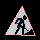

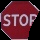

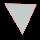

----------------------------------------------------------------------------------------------------


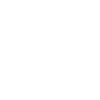

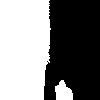

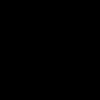

(100, 100)

a_unevenness 0.0% - 49.9% - 0.0%
no_drive     0.0% - 43.0% - 0.0%
no_entry     0.0% - 49.4% - 0.0%
parking      0.0% - 51.0% - 0.0%
pedistrain   0.0% - 50.7% - 0.0%
road_works   0.0% - 50.1% - 0.0%
stop         0.0% - 49.8% - 0.0%
way_out      0.0% - 43.9% - 0.0%
_______________
RESULT: none      
_______________
Точность: 0.7777777777777778
Число не распознанных изображений = 2 из 9


In [11]:
import cv2
import random
import numpy as np
import os


# Загрузка данных из учебных, проверочных и валидационных данных
def load_data():
    """ Формирование обучающего, тренировочного и тестового массива изображений.
    Вспомогательный файл helpers.py формирует массив изображений по заданному пути.

    Выходные данные:
    IMAGE_LIST - массив тренировочных изображений
    TEST_IMAGE_LIST - массив тестовых изображений
    VALIDATION_IMAGE_LIST - массив валидационных изображений (по этому массиву осуществляется
    проверка работы алгоритма
    """

    IMAGE_DIR_TRAINING = DRIVE_PATH + "data/training/"
    IMAGE_DIR_VALIDATION = DRIVE_PATH + "data/val/"
    IMAGE_DIR_TEST = DRIVE_PATH + "data/test/"

    IMAGE_LIST = load_dataset(IMAGE_DIR_TRAINING)
    #TEST_IMAGE_LIST = load_dataset(IMAGE_DIR_TEST)
    VALIDATION_IMAGE_LIST = load_dataset(IMAGE_DIR_VALIDATION)

    return IMAGE_LIST, [], VALIDATION_IMAGE_LIST
    return IMAGE_LIST, TEST_IMAGE_LIST, VALIDATION_IMAGE_LIST


# приведение входного изображения к стандартному виду
def standardize_input(image):
    """Приведение изображений к стандартному виду. Если вы хотите преобразовать изображение в
    формат, одинаковый для всех изображений, сделайте это здесь. В примере представлено приведение размера к одинаковому для каждого изображения

    Входные данные: изображение

    Выходные данные: стандартизированное изображений.

    """
    ## TODO: Выполните необходимые преобразования изображения для стандартизации, если это необходимо (обрезка, поворот, изменение размера)
    standard_im = np.copy(image)

    standard_im = cv2.resize(standard_im, (64, 64))
    return standard_im


# приведение всего набора изображений к стандартному виду
def standardize(image_list):
    """Функция осуществляет приведение всего набора изображений к стндартному виду

    Входные данные: блок изображений (массив)

    Выходные данные: стандартизированный блок изображений
    """

    standard_list = []

    for item in image_list:
        image = item[0]
        label = item[1]

        # стандартизация каждого изображения
        standardized_im = standardize_input(image)

        # перекодировка из названия в массив
        one_hot_label = one_hot_encode(label)[1]

        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, one_hot_label))

    return standard_list


# Получение списка неклассифицированных изображений
def get_misclassified_images(test_images):
    """Определение точности
    Сравните результаты вашего алгоритма классификации
    с истинными метками и определите точность.

    Входные данные: массив с тестовыми изображениями
    Выходные данные: массив с неправильно классифицированными метками

    Этот код используется для тестирования и не должен изменяться
    """
    misclassified_images_labels = []
    # Классификация каждого изображения и сравенение с реальной меткой
    for image in test_images:
        # получение изображения и метки
        im = image[0]
        true_label = image[1]
        # метки должны быть в виде массива
        assert (len(true_label) == 8), "Метка имеет не верную длинну (8 значений)"

        # Получение метки из написанного Вами классификатора
        predicted_label = predict_label(im)
        assert (len(predicted_label) == 8), "Метка имеет не верную длинну (8 значений)"

        # Сравнение реальной и предсказанной метки
        if (predicted_label != true_label):
            # Если значения меток не совпадают, то изображение помечается как неклассифицированное
            misclassified_images_labels.append((im, predicted_label, true_label))

    # Возвращение неклассифицированных изображений [image, predicted_label, true_label] values
    return misclassified_images_labels


def main():
    standart_signs = get_standatr_signs()
    for sign in standart_signs.values():
      cv2_imshow(sign)

    IMAGE_LIST, TEST_IMAGE_LIST, VALIDATION_IMAGE_LIST = load_data()

    STANDARDIZED_VAL_LIST = standardize(VALIDATION_IMAGE_LIST)
    random.shuffle(STANDARDIZED_VAL_LIST)

    MISCLASSIFIED = get_misclassified_images(STANDARDIZED_VAL_LIST)

    total = len(STANDARDIZED_VAL_LIST)
    num_correct = total - len(MISCLASSIFIED)
    accuracy = num_correct / total

    print('Точность: ' + str(accuracy))
    print("Число не распознанных изображений = " + str(len(MISCLASSIFIED)) + ' из ' + str(total))


if __name__ == '__main__':
    main()
